Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [34]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
wine_data = pd.read_csv('wine.csv')

In [3]:
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### 1. PCA

In [4]:
x = wine_data.drop(columns=['Type'])

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca=PCA(n_components=3)
PrinComps = pca.fit_transform(x)
Prin_winedata = pd.DataFrame(data=PrinComps, columns=['PC1','PC2','PC3'])


### 1. Hierarchial Clustering

In [21]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import  fcluster

In [13]:
link_winedata = linkage(Prin_winedata)

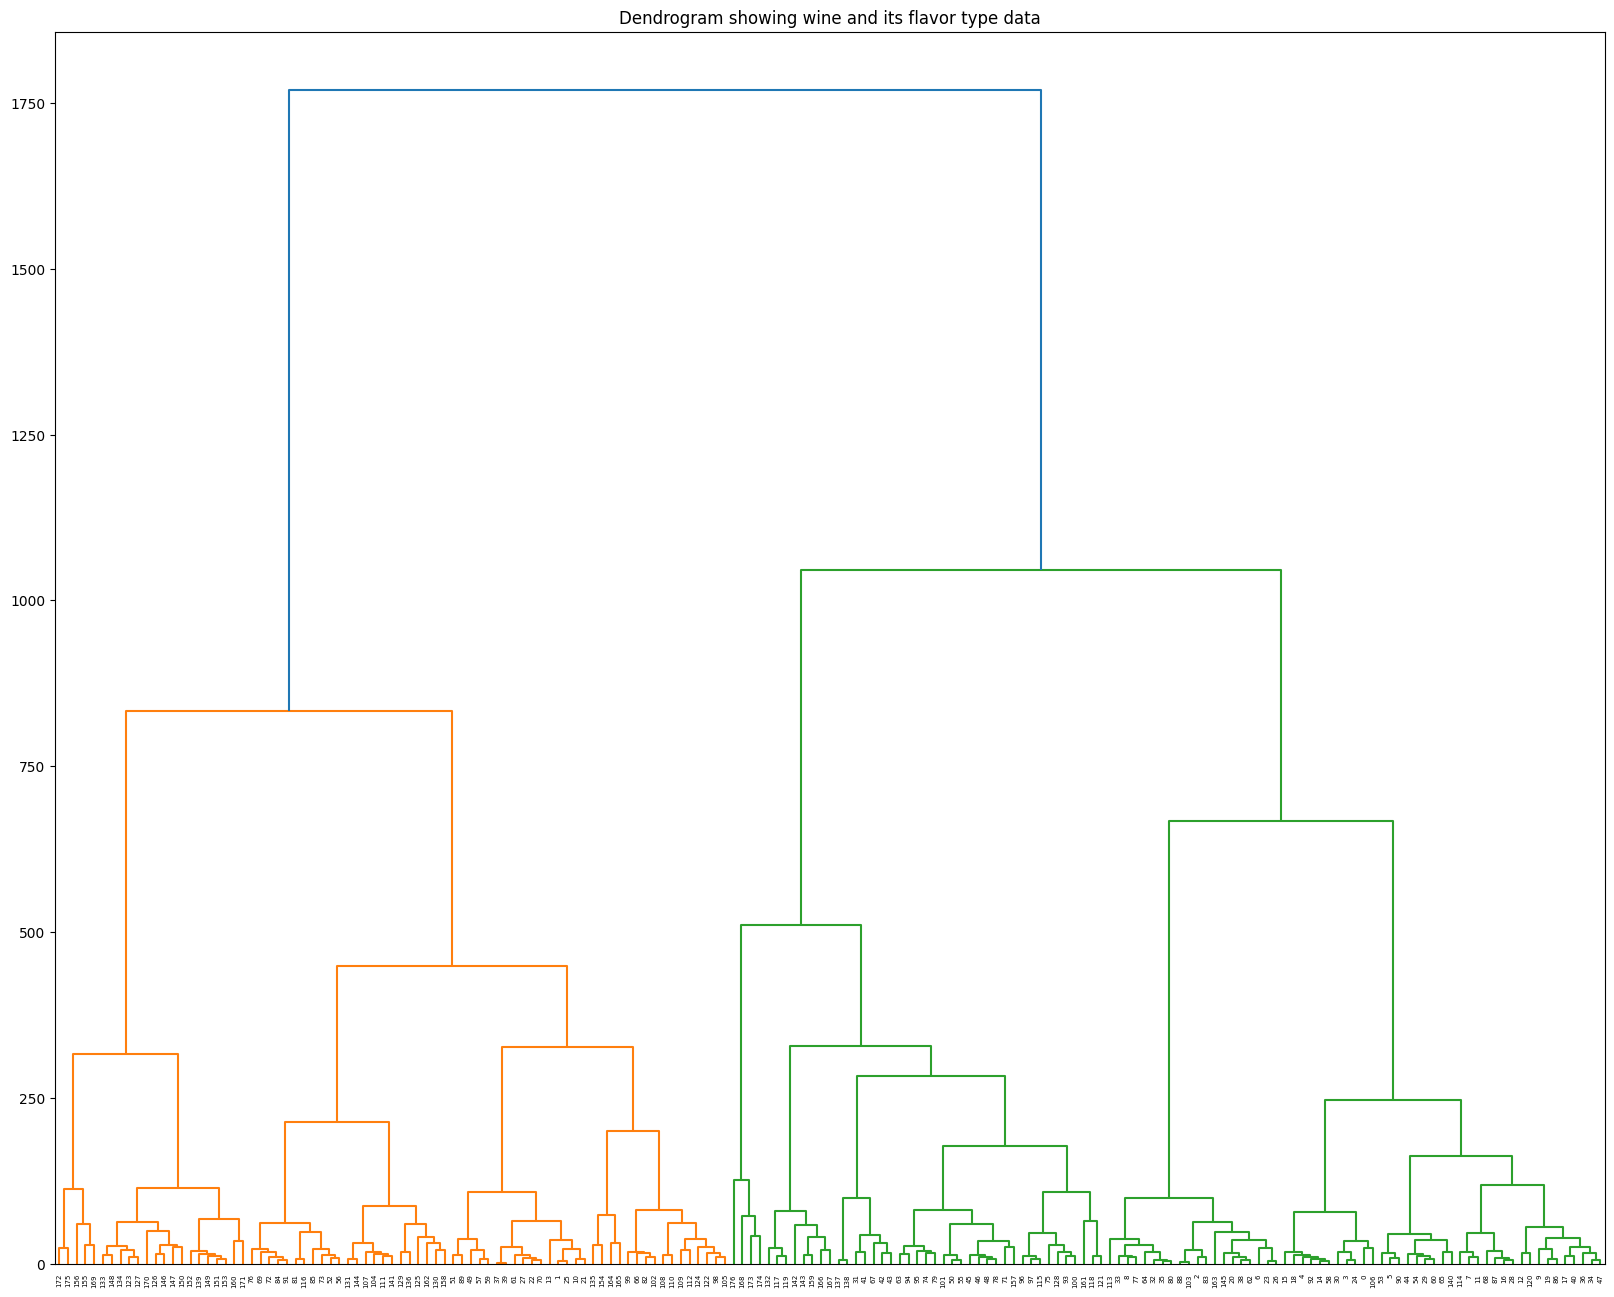

In [18]:
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(20,16))
plt.title("Dendrogram showing wine and its flavor type data")
dend = shc.dendrogram(shc.linkage(link_winedata,method="ward"))

In [19]:
num_unique_types = len(wine_data['Type'].unique())

In [28]:
link_mat = linkage(wine_data, method='ward')
threshold = 5 
ind_clusters = fcluster(link_mat, threshold, criterion='distance')
clusters_count = len(set(ind_clusters))

uniq_types = len(wine_data['Type'].unique())

clusters_count == uniq_types


False

### Hence, Number of cluster do not match the number of unique types in the original data

In [31]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WSSE')

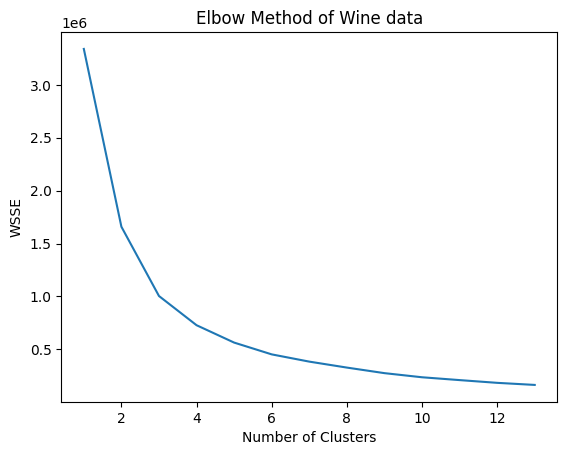

In [37]:
from warnings import filterwarnings 
filterwarnings("ignore")

wsse = []
for i in range(1,14):
    kmeans = KMeans(n_clusters= i, random_state=21)
    kmeans.fit(link_winedata)
    wsse.append(kmeans.inertia_)
plt.plot(range(1,14),wsse)
plt.title('Elbow Method of Wine data')
plt.xlabel('Number of Clusters')
plt.ylabel('WSSE')
    